In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import torch
import numpy as np
from sqnet import SQNet
from utils import solve_crocoddyl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
net = torch.load("sqnet2.pth")

In [4]:
# Generate test data
xrange = np.linspace(-1.,1.,100)
xtest = torch.tensor([ [x1,x2, 0.] for x1 in xrange for x2 in xrange ], dtype = torch.float32)

In [5]:
# Get the true cost by solving crocoddyl
y_true = []
for xyz in xtest:
    xyz = xyz.numpy()
    ddp = solve_crocoddyl(xyz)
    y_true.append([ddp.cost])
y_true = np.array(y_true)
y_true = torch.tensor(y_true, dtype = torch.float32)

In [6]:
# Predictions
net.eval()
with torch.no_grad():
    y_pred = net(xtest)
    
error = (y_true - y_pred)
print(f"Mean Squared Error during testing is {torch.mean(error ** 2)}") 
print("......................................................................")   

Mean Squared Error during testing is 0.24778705835342407
......................................................................


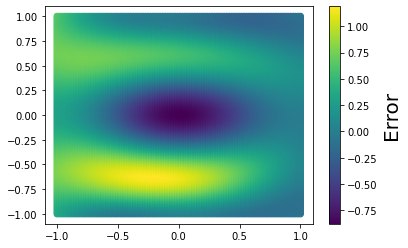

In [7]:
plt.clf()
plt.scatter(xtest.numpy()[:,0], xtest.numpy()[:,1], c = error.numpy())
plt.colorbar().set_label("Error", labelpad = 4, fontsize = 20)
